In [35]:
with open('5.txt') as files:
    output = {}
    for line in files.readlines():
        line = line.strip()
        if line.count(',') == 1:
            dictKey = tuple(map(int, (line.split(','))))
            output[dictKey] = []
            currentPoint = dictKey
        else:
            temp = list(map(float, line.split(',')))
            output[currentPoint].append(temp)

In [36]:
len(output)

9

In [37]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook


In [38]:
def convert_to_cm(x, y):
    dWidth = 58.5
    dHeight = 104.05
    screenWidth = 375
    screenHeight = 667
#             let dX = 18.61
#         let dY = 8.03
    dx = 18.61
    dy = 8.03
    x = x/screenWidth*dWidth
    y = y/screenHeight*dHeight
    x -= dx
    y = y + dy
    return (x/10, y/10)

convert_to_cm(1, 1)

def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt( (x1-x2)**2 + (y1-y2)**2)

<IPython.core.display.Javascript object>


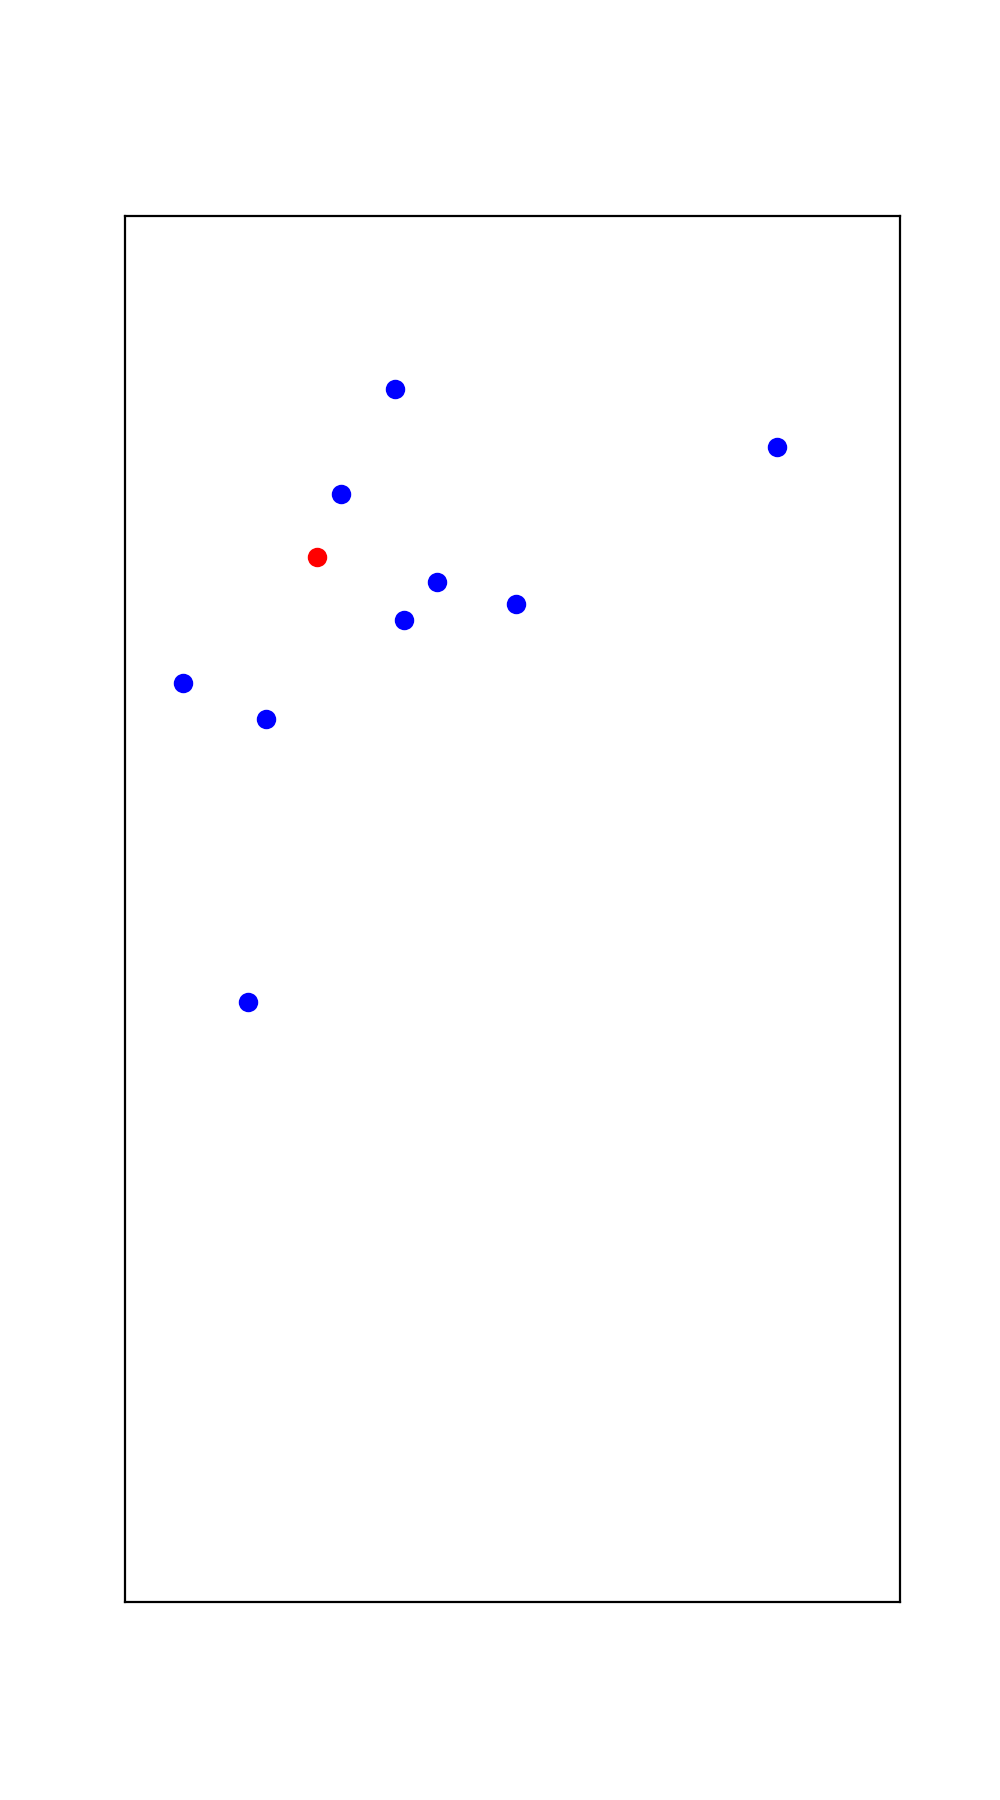

<IPython.core.display.Javascript object>


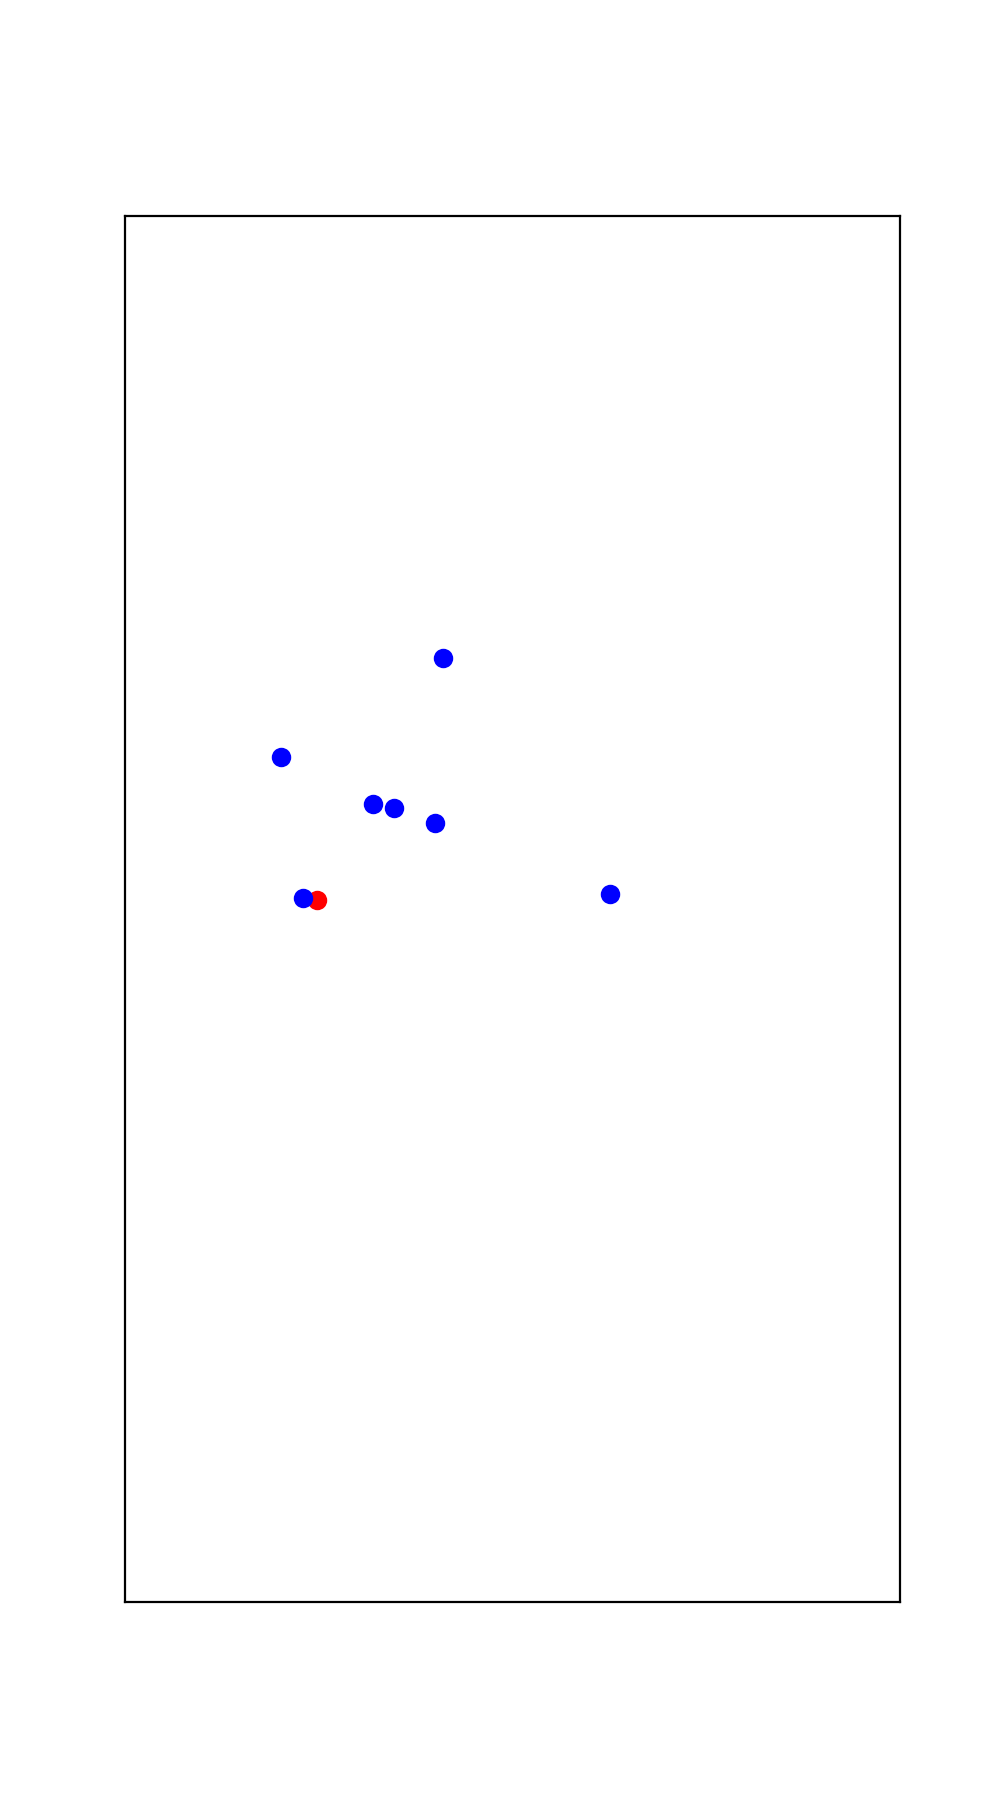

<IPython.core.display.Javascript object>


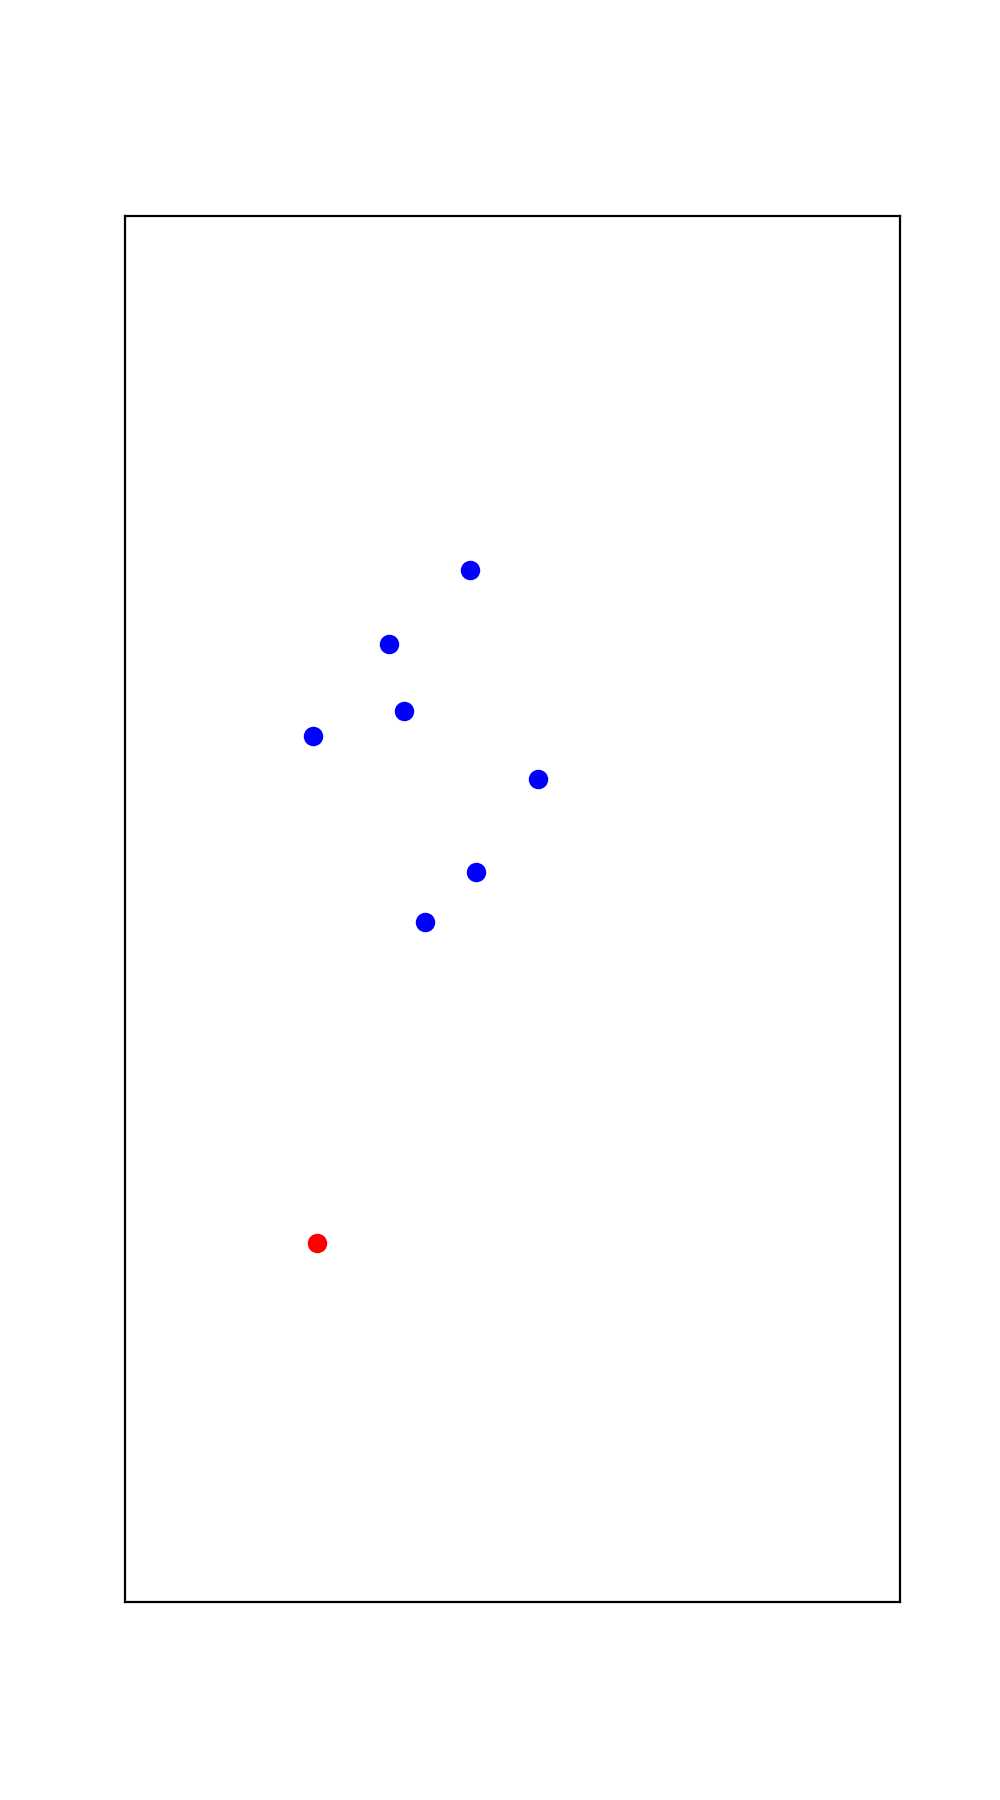

<IPython.core.display.Javascript object>


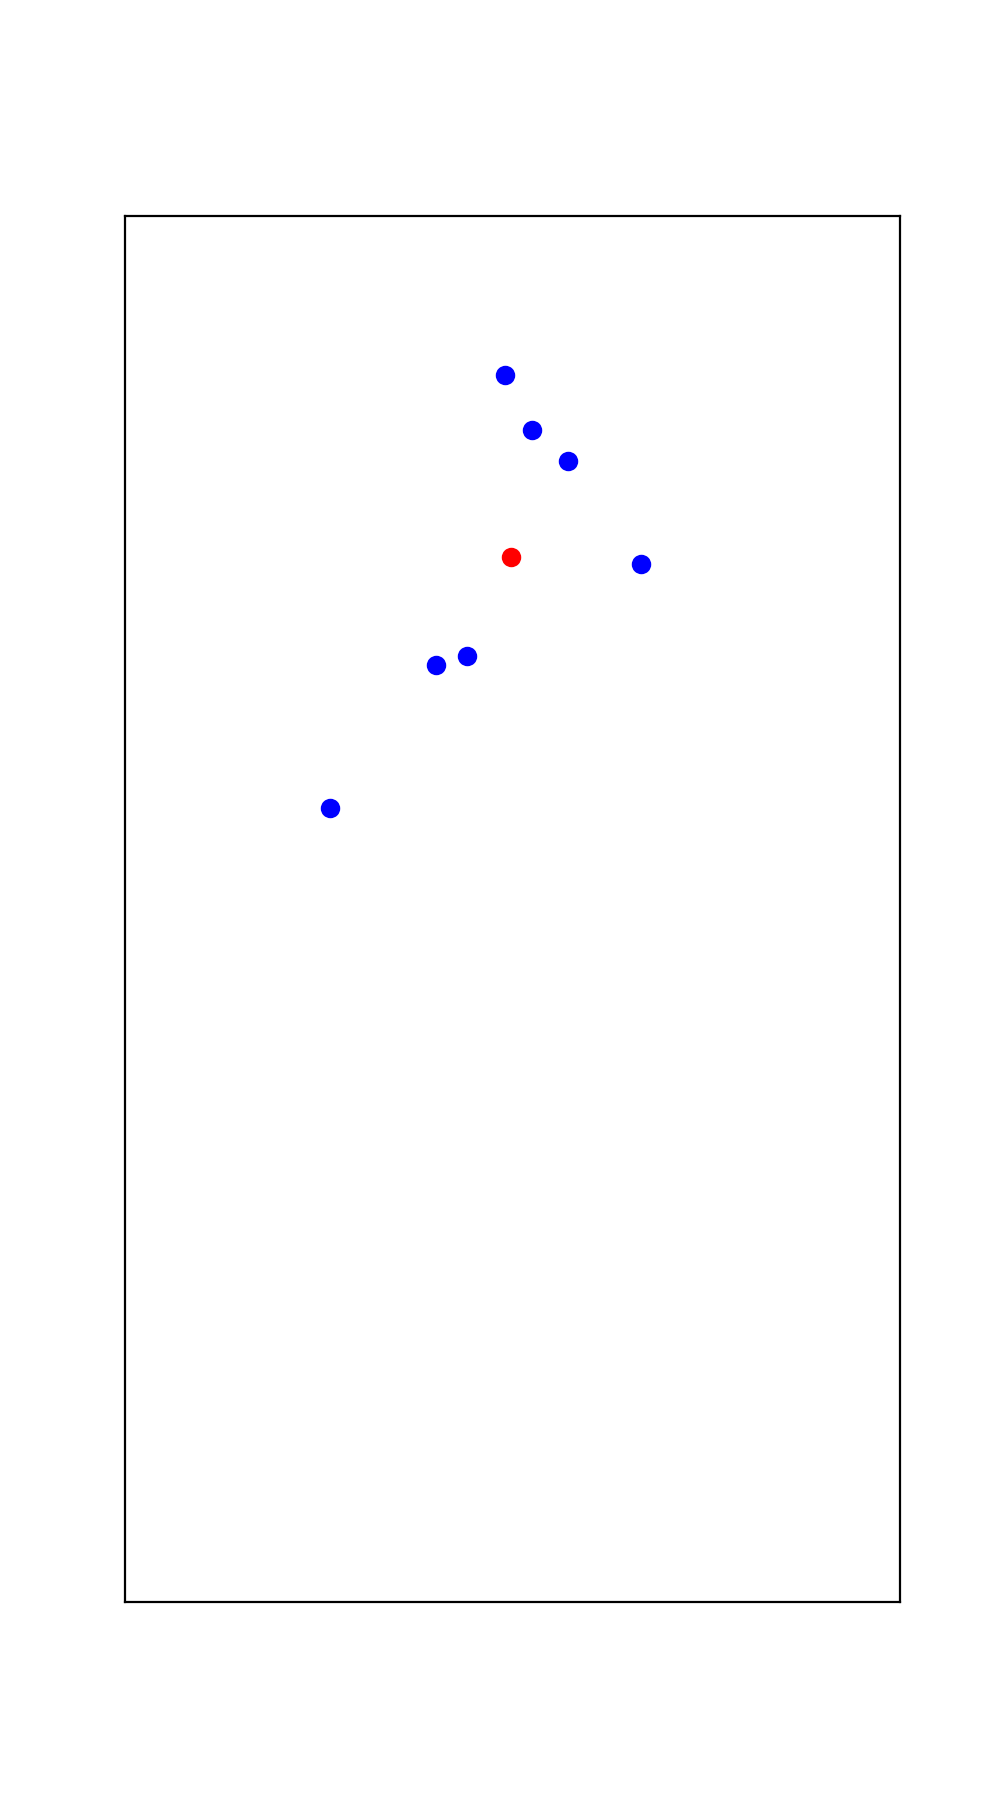

<IPython.core.display.Javascript object>


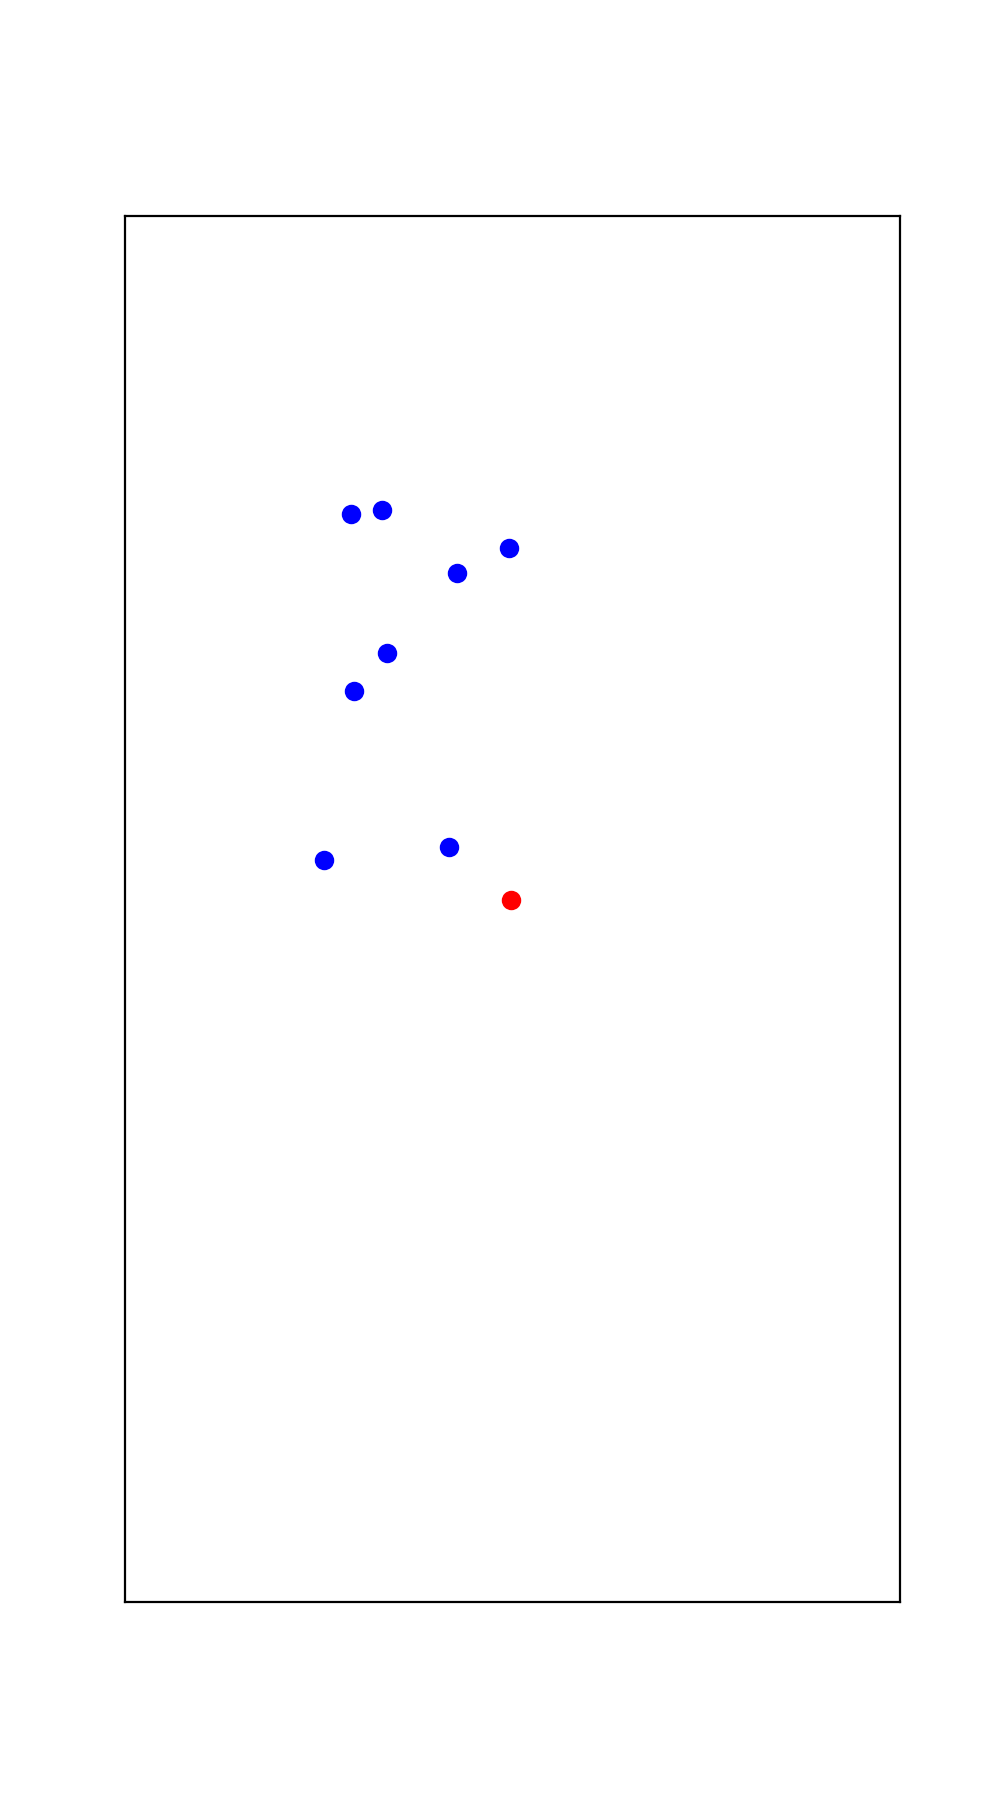

<IPython.core.display.Javascript object>


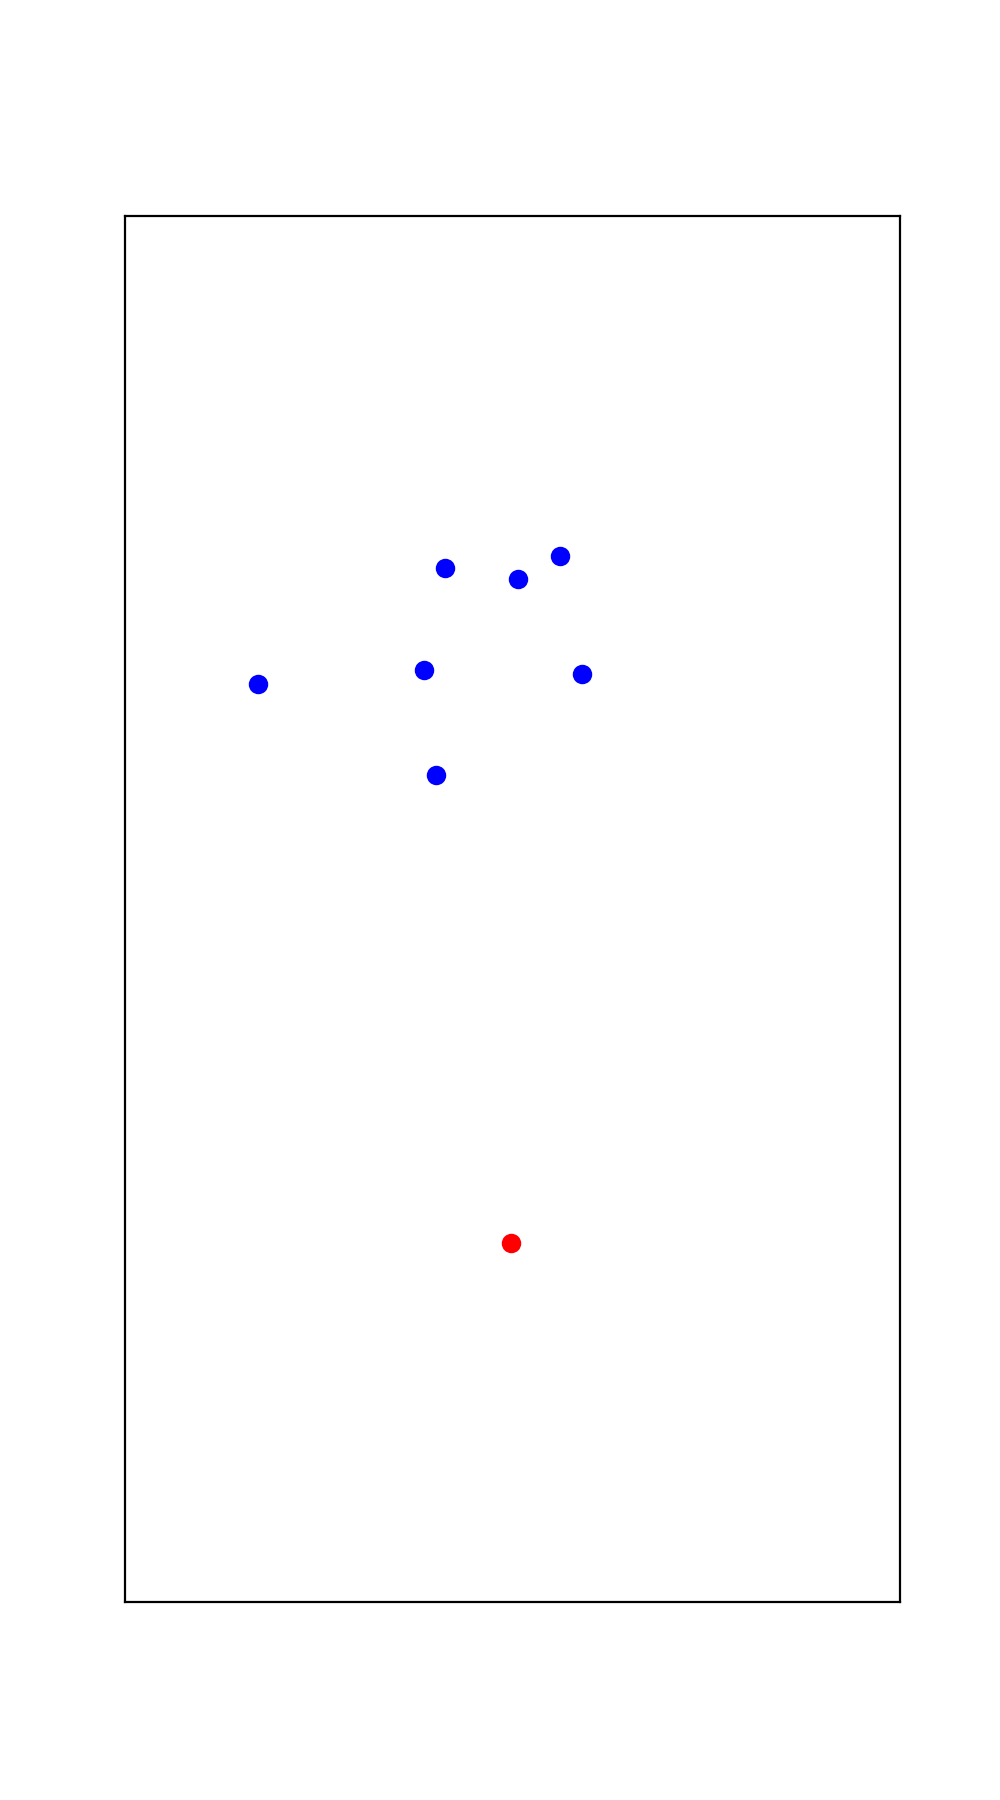

<IPython.core.display.Javascript object>


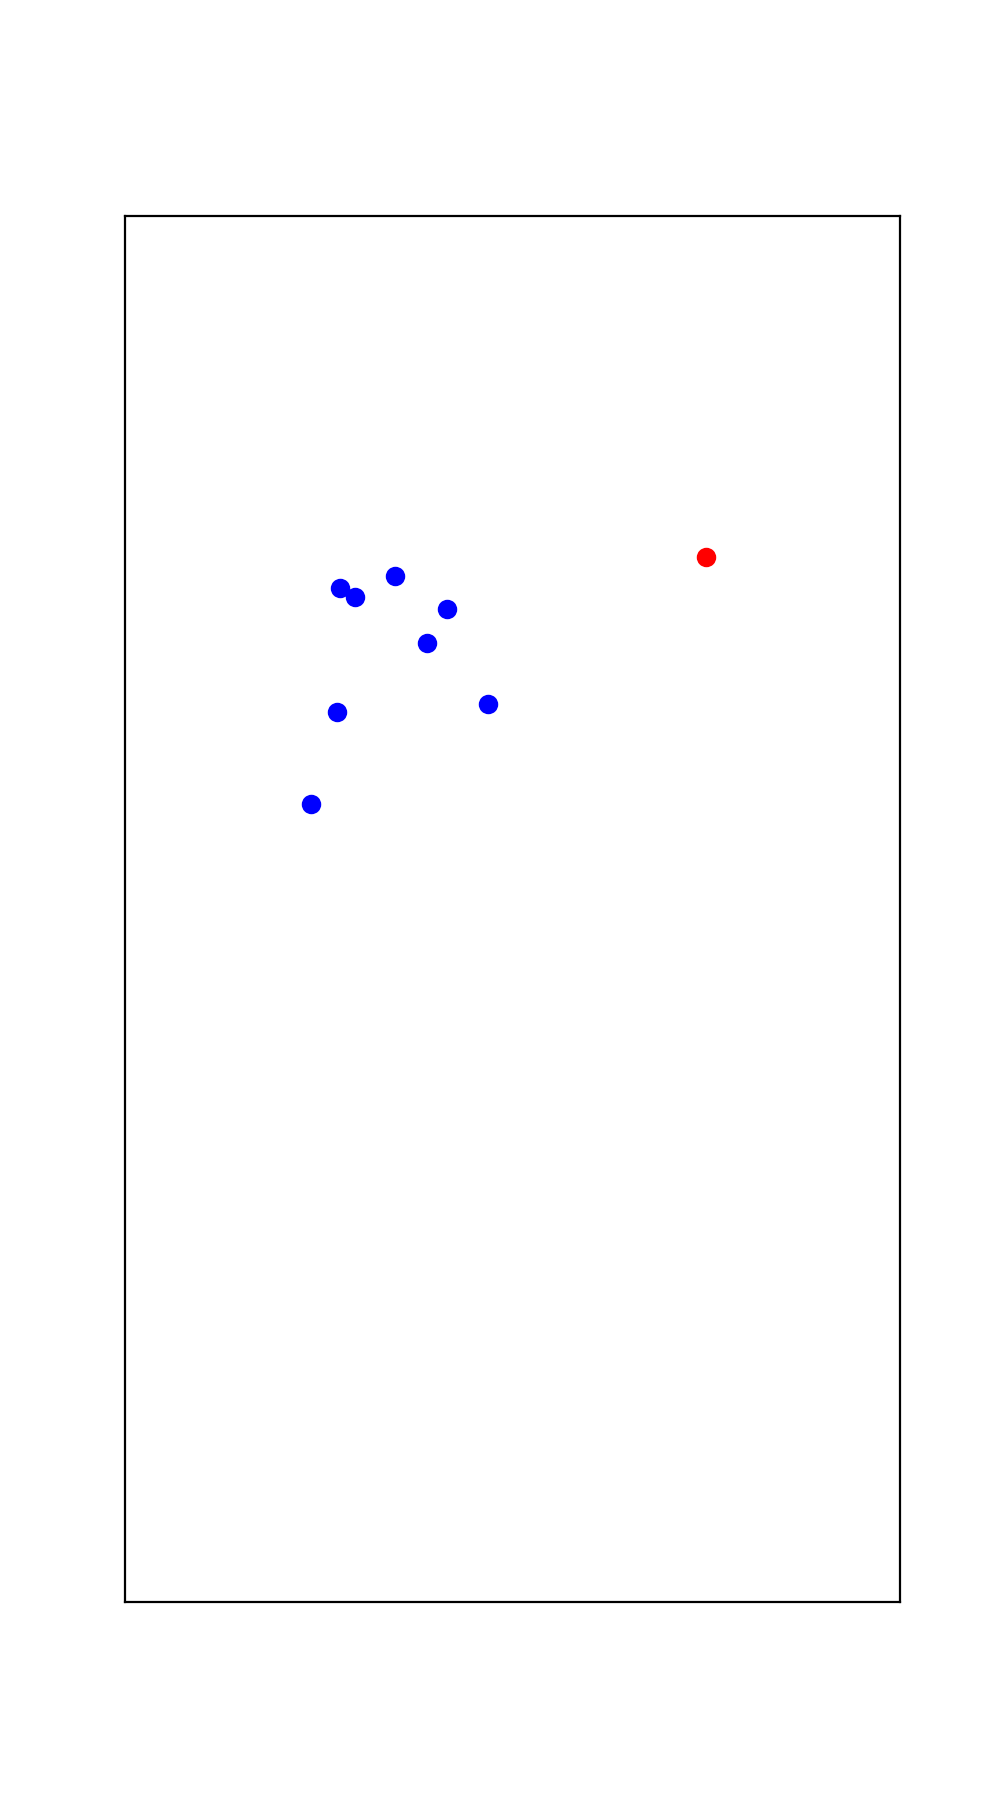

<IPython.core.display.Javascript object>


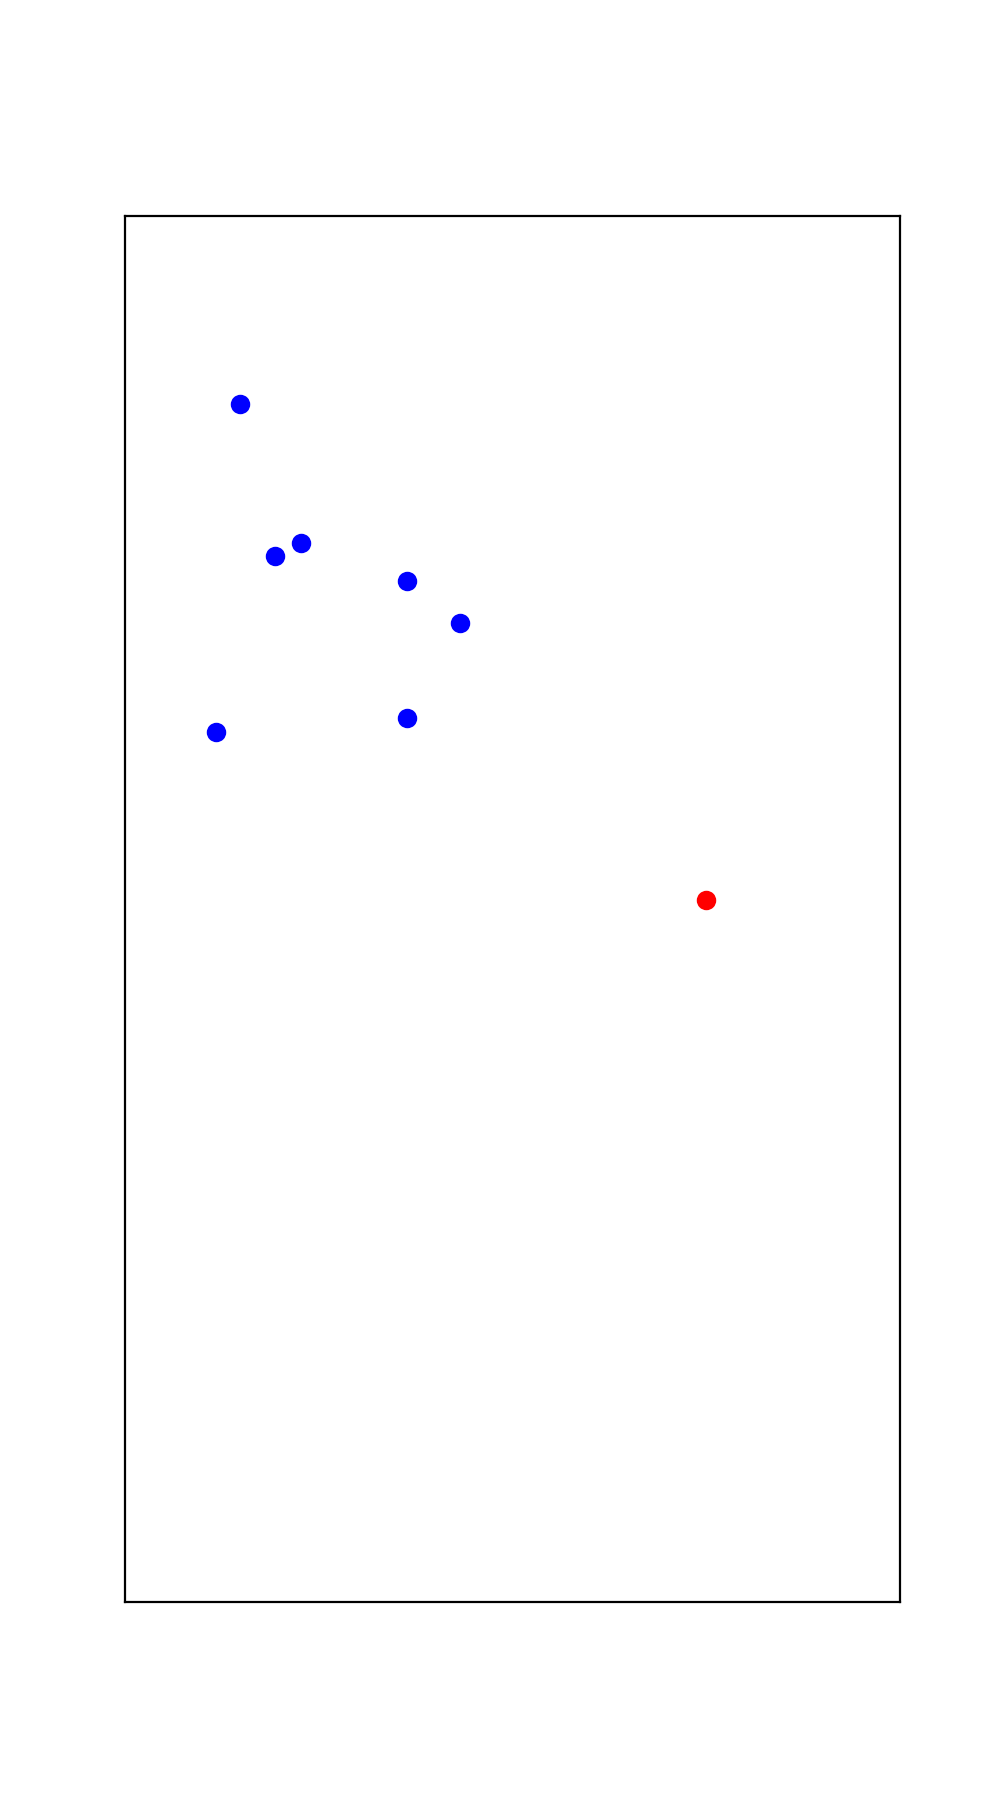

<IPython.core.display.Javascript object>


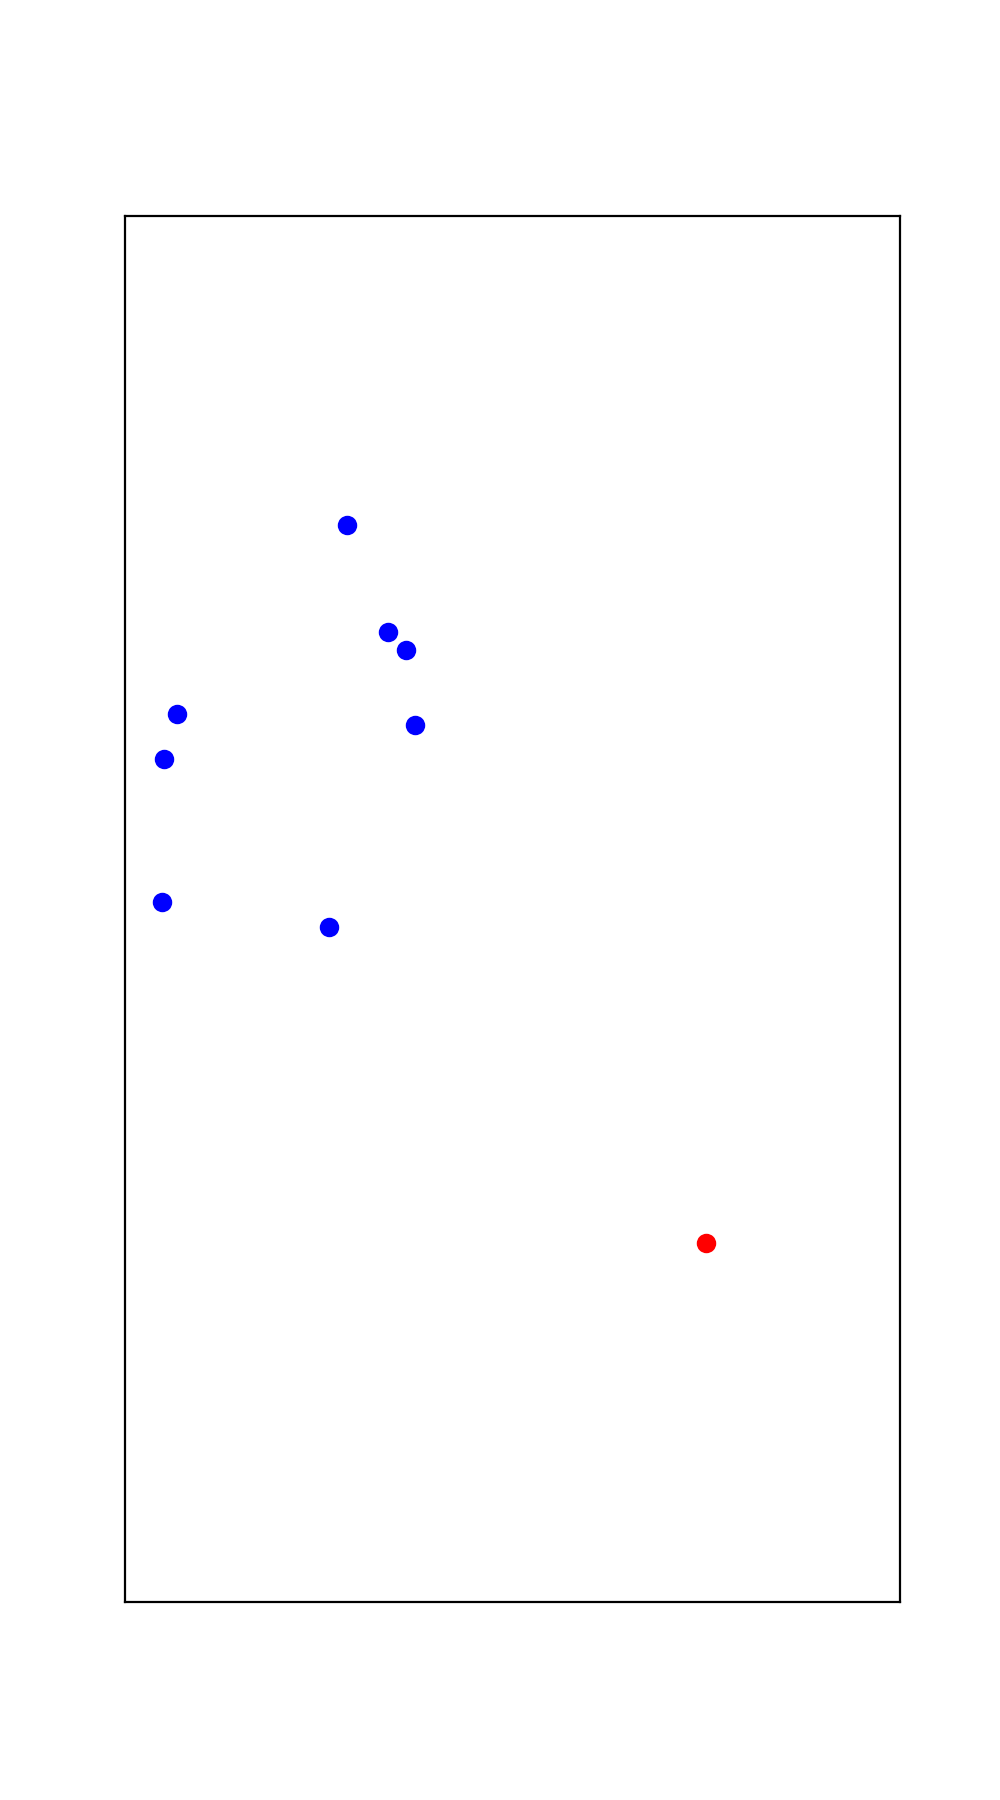

In [33]:
count = 0
for index, key in enumerate(sorted(output)):
    if(len(output[key]) < 5):
        continue
    fig, axes = plt.subplots()
    axes.set_xlim(0, 375)
    axes.set_ylim(-675, 0)
    x, y = key
    y = -y
    fig.set_size_inches(5, 9)
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    axes.scatter(x, y, color='red')
    x1, y1 = convert_to_cm(x, y)
    for i in output[key]:
        pre_x, pre_y = i[2], -i[3]
        axes.scatter(pre_x, pre_y, color='blue')
        x2, y2 = convert_to_cm(pre_x, pre_y)
    fig.savefig(str(count) + '.png')
    count += 1

In [40]:
count = 0
total = 0
total_out_screen = 0
for index, key in enumerate(sorted(output)):
    if(len(output[key]) < 5):
        continue
    x, y = key
    x1, y1 = convert_to_cm(x, y)
    for i in output[key]:
        count += 1
        pre_x, pre_y = i[2], i[3]
#         print(pre_x, pre_y)
        if pre_x >= 0 and pre_x <= 375 and pre_y >= 0 and pre_y <= 675:
            x2, y2 = convert_to_cm(pre_x, pre_y)
    #         print(x2, i[0])
    #         print(x2, y2)
            total += euclidean_distance(x1, y1, x2, y2)
    #         print(euclidean_distance(x1, y1, x2, y2))
        else:
            x2, y2 = convert_to_cm(pre_x, pre_y)
    #         print(x2, i[0])
    #         print(x2, y2)
            total += euclidean_distance(x1, y1, x2, y2)
            total_out_screen += 1
# print(total)
# print(count)
print("Total Point = " +str(count))
print("Total Error = " + str(total/count) + " cm.")
print("Predict Point Outside the screen = " + str(total_out_screen) + " point")

Total Point = 72
Total Error = 4.64772191811 cm.
Predict Point Outside the screen = 18 point


In [43]:
total_point = 0
total_distance = 0
all_out_screen = 0
for filename in ['1.txt', '2.txt', '3.txt', '4.txt', '5.txt']:
    with open(filename) as currentFile:
        output = {}
        for line in currentFile.readlines():
            line = line.strip()
            if line.count(',') == 1:
                dictKey = tuple(map(int, (line.split(','))))
                output[dictKey] = []
                currentPoint = dictKey
            else:
                temp = list(map(float, line.split(',')))
                output[currentPoint].append(temp)
        count = 0
        total = 0
        total_out_screen = 0
        for index, key in enumerate(sorted(output)):
            if(len(output[key]) < 5):
                continue
            x, y = key
            x1, y1 = convert_to_cm(x, y)
            for i in output[key]:
                count += 1
                pre_x, pre_y = i[2], i[3]
        #         print(pre_x, pre_y)
                if pre_x >= 0 and pre_x <= 375 and pre_y >= 0 and pre_y <= 675:
                    x2, y2 = convert_to_cm(pre_x, pre_y)
            #         print(x2, i[0])
            #         print(x2, y2)
                    total += euclidean_distance(x1, y1, x2, y2)
            #         print(euclidean_distance(x1, y1, x2, y2))
                else:
                    x2, y2 = convert_to_cm(pre_x, pre_y)
            #         print(x2, i[0])
            #         print(x2, y2)
                    total += euclidean_distance(x1, y1, x2, y2)
                    total_out_screen += 1
        print("Total Point = " +str(count))
        print("Total Error = " + str(total/count) + " cm.")
        print("Predict Point Outside the screen = " + str(total_out_screen) + " point")
        total_point += count
        total_distance += total
        all_out_screen += total_out_screen

print(total_point)
print(total_distance)
print(total_distance/total_point)
print(all_out_screen)

Total Point = 69
Total Error = 5.03155650924 cm.
Predict Point Outside the screen = 29 point
Total Point = 66
Total Error = 1.15875229641 cm.
Predict Point Outside the screen = 46 point
Total Point = 62
Total Error = 3.01371882141 cm.
Predict Point Outside the screen = 25 point
Total Point = 70
Total Error = 4.11440790388 cm.
Predict Point Outside the screen = 2 point
Total Point = 72
Total Error = 4.64772191811 cm.
Predict Point Outside the screen = 18 point
339
1233.150149
3.63761105901
120
